FWI of **Marmousi 2D** test-dataset © 2019-2020 Kajetan Chrapkiewicz.

##### Setup

###### Global variables

In [1]:
rawsign = 'bckp/A-RawSign.sgy'
sp = 'bckp/A-SegyPrep.key'
truevp = 'bckp/A-TrueVp.sgy'
startvp = 'bckp/B-StartVp.sgy'

###### Notebook setup

In [2]:
from fullwavepy.signal.phase import *
from fullwavepy.signal.phase import _window_data

In [3]:
from fullwavepy.paths_kmc import exe

In [4]:
# %load ~/software/fullwavepy/nb_config.py
# -----------------------------------------------------------------------------
# Load default notebook's callables (defined in fullwavepy/__init__.py)
# -----------------------------------------------------------------------------
from fullwavepy import *

# -----------------------------------------------------------------------------
# Configure matplotlib
# -----------------------------------------------------------------------------

# Set matplotlib's backend ------

# 1. non-interactive plots, display in a notebook cell
%matplotlib inline

# 2. interactive plots, display in a notebook cell
 # %matplotlib notebook

# Set matplotlib's style ---------
plt.style.reload_library()

# Combine styles (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot', 'kmc_test'])
# print(plt.style.available)

# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
from fullwavepy.logging_config import *
log_lvl(INFO) # TRACE / DEBUG / INFO / WARNING / ERROR / CRITICAL

# -----------------------------------------------------------------------------
# Other notebook's configuration
# -----------------------------------------------------------------------------

# autocompleting
%config IPCompleter.greedy=True 

# automatically reload modules before execution
%load_ext autoreload
%autoreload 2

# Introduction

Derive a robust workflow including data filtering and time-windowing changing over iterations! **Together with a 3D version (de facto 2.5D) it covers all possible user-cases**. 

# Acquisition geometry

In [5]:
dims = [1361, 1, 281]
dx = 12.5 # m
dt = 0.001 # s
ns = 6000

# Synthetic

## All sources

### Inp

In [8]:
# proj.inp.truevp.plot(cbar=1)
# proj.inp.s.plot(unit='node')
# proj.inp.r.plot(unit='node')
# plt.xlabel('in-line node')
# plt.ylabel('depth node')

In [7]:
proj = ProjSynVsObs('p03', io='sgy', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)
# # proj.inp.truevp.prepare(source=truevp)

# # proj.inp.rawsign.prepare(source=rawsign)
# # proj.inp.sp.prepare(source=sp)
# # # proj.inp.sp.cat()
# # proj.inp.sp.run()
# proj.inp.runfile.prepare(dim='2D', io='sgy', cat=1)
# # proj.inp.runfile.cat()
# proj.inp.bash.prepare(ompthreads=8, cat=1)
# proj.inp.pbs.prepare(hours=4, select=3, mpiprocs=6, q='multi', cat=1)
# # proj.inp.plot()

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p03/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: synthetic
io: sgy
kernel: low
domain: time
dim: 2D
equation: acoustic
anisotropy: none
qp: False
qs: False



### Out

In [9]:
proj.out.out.cat()

Content of  ./p03//out/p03-Out.log : 
pbsexec: requested walltime 3600 seconds
pbsexec: grace period 1200 seconds
pbsexec: terminating after 2400 seconds
pbsexec: mpiexec /rds/general/user/kmc3817/home/PhD/fullwave3D/rev690/bin/fullwave3D.exe p03 -1 4
# mpiexec: No RDMA network found -- using sockets+shared memory (I_MPI_DEVICE=ssm)
# mpiexec: full path to program is /rds/general/user/kmc3817/home/PhD/fullwave3D/rev690/bin/fullwave3D.exe
# mpiexec: program arguments are: p03 -1 4
# mpiexec: 20 ranks allocated via PBS select
# mpiexec: 4 OpenMP threads / rank allocated by PBS select
# mpiexec: Job has exclusive use of the allocated nodes. Enabling process-pinning
# mpiexec: machinefile configured as:
cx1-109-16-3.cx1.hpc.ic.ac.uk:10
cx1-109-2-1.cx1.hpc.ic.ac.uk:10
#
# mpiexec: Checking all nodes are ONLINE:
# mpiexec: All nodes appear ONLINE
# mpiexec: launch started at Sun 13 Oct 13:05:54 BST 2019
# mpiexec: launching program...
# /rds/general/user/kmc3817/home/PhD/fullwave3D/rev690/bi

## 6 sources

### Inp

In [21]:
env = {'SCHEDULER_DUMPRAWGRAD' : None,
       'SCHEDULER_DUMPRAWPREC' : None,
       'SCHEDULER_SHOWLEVEL': 10,
       'SCHEDULER_CHECKVERBOSEFILE': None,
       'SLAVES_SHOWLEVEL': 10,
       'SLAVES_CHECKVERBOSEFILE': None,
      }

proj = ProjSynVsObs('p01', path='p01', io='sgy', dt=dt, ns=ns,
              exe=exe, env=env)

# proj.inp.sp.prepare(geometry='regular', geometry_in_nodes=False,
#                     souz=12, recz=400, soux0=1e4, recx0=1.5e4, soudx=1e4, recdx=1e4, sounx=6, recnx=6,
#                     cat=0)

# proj.inp.sp.run(cat=0)
# proj.inp.runfile.prepare(cat=0)
# proj.inp.runfile.cat()
# proj.inp.bash.prepare(cat=0)
proj.inp.pbs.prepare(cat=0)
# proj.inp.plot()

INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: p01/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: synthetic
io: sgy
kernel: low
domain: time
dim: 3D
equation: acoustic
anisotropy: none
qp: False
qs: False



INFO:fullwavepy.project.runfiles.PbsFile.create: Creating p01//inp/fullwave3d-verbose-scheduler


In [15]:
proj.dt

0.005

In [12]:
proj.dims

[1361, 1, 281]

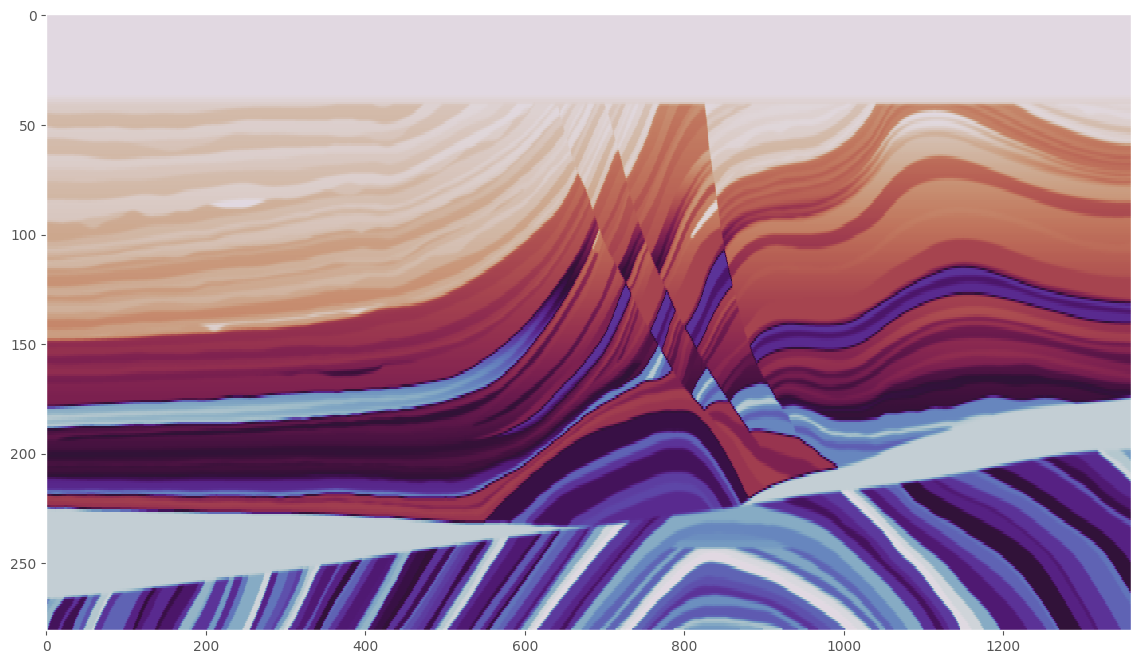

In [6]:
proj.inp.truevp.plot()

### Run

In [6]:
proj.run()
proj.out.out.cat()

INFO:fullwavepy.project.projtypes.Proj.run: mv: cannot stat 'p01-*Observed-Time*': No such file or directory
mv: cannot stat 'p01-*CP*': No such file or directory



### Out

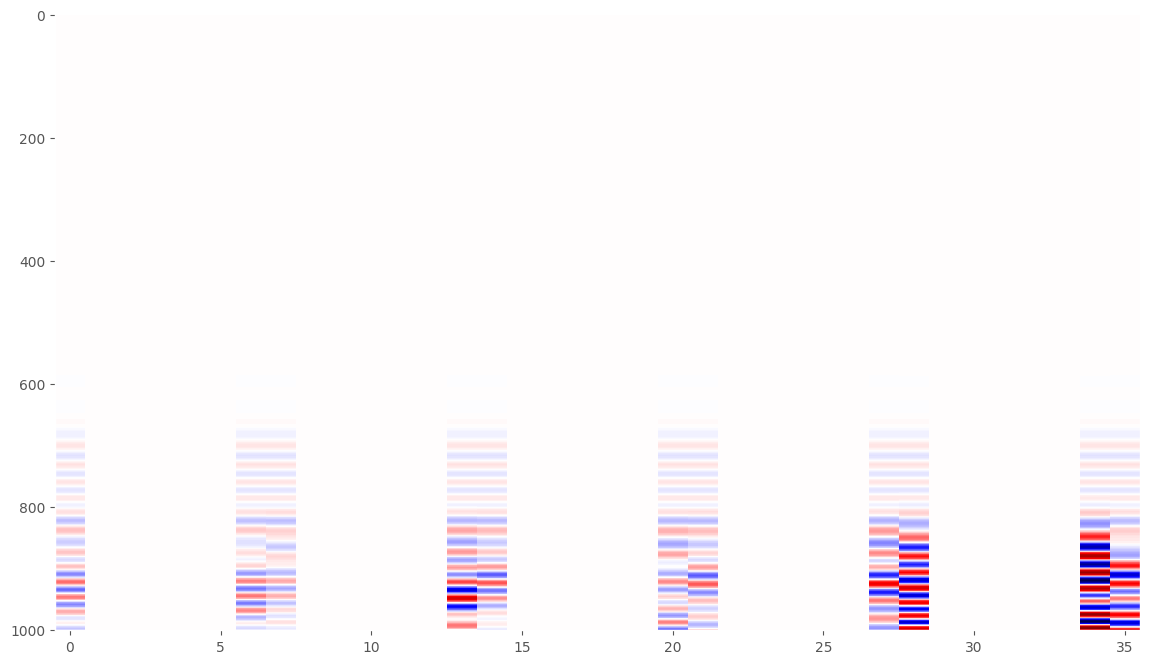

In [15]:
proj.out.synth.plot()

In [9]:
# plot('p01/out/p01-fw-000500-csref00001-iter00001-taskid00004.vtr', norm='max', scoord='z')

In [10]:
# proj.out.ls()
# proj.out.out.cat()

In [11]:
# proj.out.synth.plot(norm='max')
# # plt.xlim(0,100)

In [16]:
A = read_any('p01/out/p01-SLAVES_DUMPDAT-csref00001-iter00001-taskid00001.ttr')
A.shape

(322, 1, 501)

(0, 500)

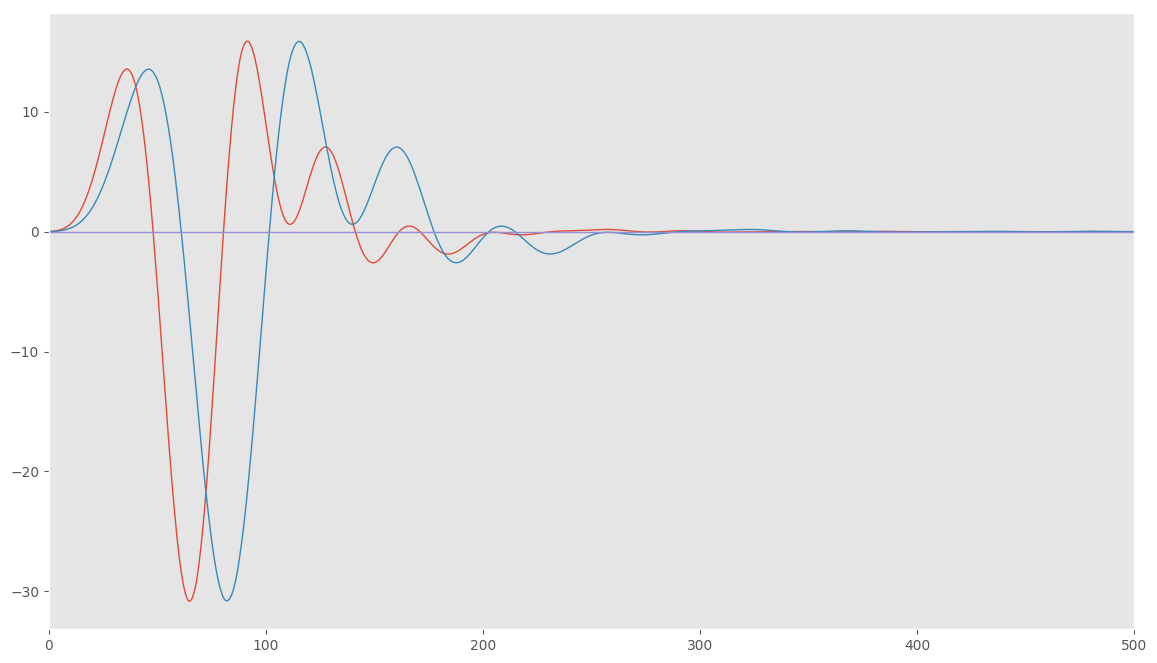

In [26]:
proj.inp.wavelet.plot()
a = A[0][0]
b = A[-1][0]
plt.plot(a)
plt.plot(b)
plt.xlim(0,500)

## 1 src, 1 rec

In [ ]:
proj = ProjSynVsObs('p04', io='sgy', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)
    # proj.inp.truevp.prepare(source=truevp)
    # # proj.inp.truevp.plot()
    # proj.inp.rawsign.prepare(source=rawsign)
    # plt.figure()
    # proj.inp.rawsign.plot()
    proj.inp.sp.prepare(geometry='regular', geometry_in_nodes=False,
                        souz=12.5, recz=12.5, soux0=500, recx0=3000,
                        soudx=100, recdx=50, sounx=1, recnx=1, cat=0) #source=sp)
    # proj.inp.sp.cat()
    proj.inp.sp.run(cat=0)
    # proj.inp.runfile.prepare(cat=1)
    # # proj.inp.runfile.cat()
    # proj.inp.bash.prepare(cat=1)
    # proj.inp.pbs.prepare(select=1, mpiprocs=32, q='general', cat=1)
    # proj.inp.plot()
    proj.run(cat=0)
    plt.subplot(*splt, i+1)
    plt.title(param+'='+str(val))
    proj.out.synth.plot()
    i += 1

## 1 src 1 rec: tuning

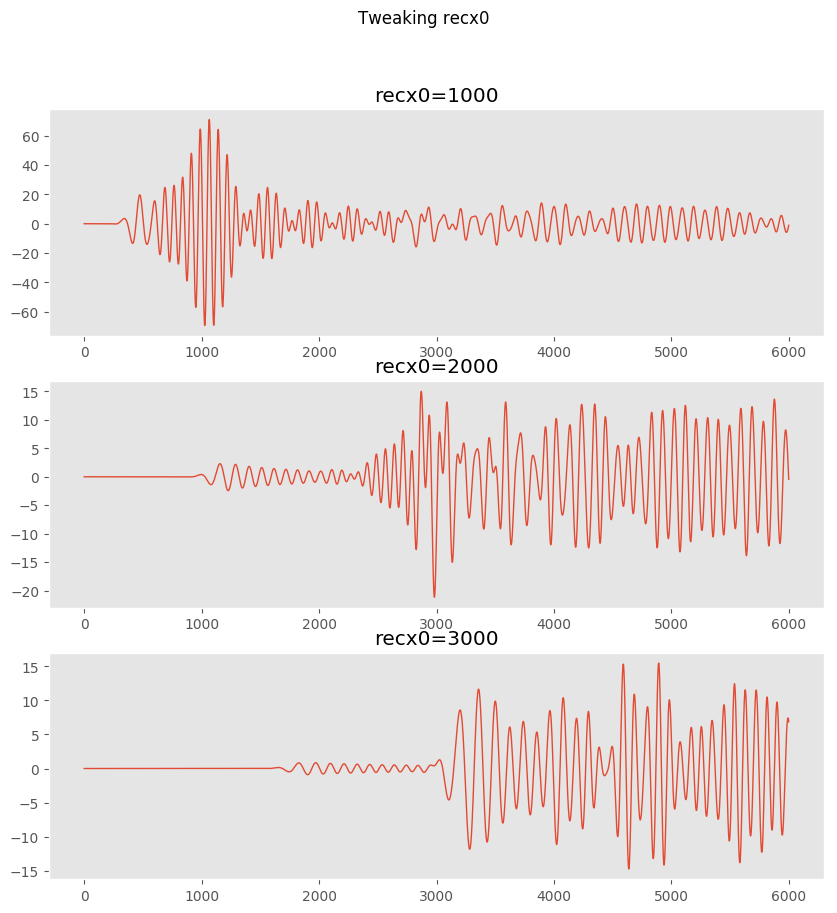

In [33]:
# proj = ProjSynVsObs('p04', io='sgy', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)
param = 'recx0'
vals = np.arange(1,4) * 1000
splt = (len(vals),1)
plt.subplots(*splt, figsize=(10,10))
plt.suptitle('Tweaking '+param)
for i, val in enumerate(vals):
    # proj.inp.truevp.prepare(source=truevp)
    # # proj.inp.truevp.plot()
    # proj.inp.rawsign.prepare(source=rawsign)
    # plt.figure()
    # proj.inp.rawsign.plot()
    proj.inp.sp.prepare(geometry='regular', geometry_in_nodes=False,
                        souz=12.5, recz=12.5, soux0=500, recx0=val,
                        soudx=100, recdx=50, sounx=1, recnx=1, cat=0) #source=sp)
    # proj.inp.sp.cat()
    proj.inp.sp.run(cat=0)
    # proj.inp.runfile.prepare(cat=1)
    # # proj.inp.runfile.cat()
    # proj.inp.bash.prepare(cat=1)
    # proj.inp.pbs.prepare(select=1, mpiprocs=32, q='general', cat=1)
    # proj.inp.plot()
    proj.run(cat=0)
    plt.subplot(*splt, i+1)
    plt.title(param+'='+str(val))
    proj.out.synth.plot()
    i += 1

In [34]:
# # proj = ProjSynVsObs('p04', io='sgy', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)
# for recz in np.arange(1,4) * 100:
#     # proj.inp.truevp.prepare(source=truevp)
#     # # proj.inp.truevp.plot()
#     # proj.inp.rawsign.prepare(source=rawsign)
#     # plt.figure()
#     # proj.inp.rawsign.plot()
#     proj.inp.sp.prepare(geometry='regular', geometry_in_nodes=False,
#                         souz=12.5, recz=recz, soux0=500, recx0=500,
#                         soudx=100, recdx=50, sounx=1, recnx=1, cat=0) #source=sp)
#     # proj.inp.sp.cat()
#     proj.inp.sp.run(cat=0)
#     # proj.inp.runfile.prepare(cat=1)
#     # # proj.inp.runfile.cat()
#     # proj.inp.bash.prepare(cat=1)
#     # proj.inp.pbs.prepare(select=1, mpiprocs=32, q='general', cat=1)
#     # proj.inp.plot()
#     proj.run(cat=0)
#     plt.figure()
#     proj.out.synth.plot()

## 1 src, 100 recs

In [16]:
recnx = 100
proj = ProjSynVsObs('p06', io='sgy', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)
# proj.inp.truevp.prepare(source=truevp)
# proj.inp.truevp.plot()
# proj.inp.rawsign.prepare(source=rawsign)
    # plt.figure()
    # proj.inp.rawsign.plot()
proj.inp.sp.prepare(geometry='regular', geometry_in_nodes=False,
                        souz=12.5, recz=12.5, soux0=500, recx0=3000,
                        soudx=100, recdx=50, sounx=1, recnx=recnx, cat=0) #source=sp)
# proj.inp.sp.cat()
proj.inp.sp.run(cat=1)
proj.inp.runfile.prepare(cat=0)
    # proj.inp.runfile.cat()
# proj.inp.bash.prepare(cat=1)
#     # proj.inp.pbs.prepare(select=1, mpiprocs=32, q='general', cat=1)
#     # proj.inp.plot()
proj.run(timer=1, cat=0)
#     plt.subplot(*splt, i+1)
#     plt.title(param+'='+str(val))
#     proj.out.synth.plot()
#     i += 1

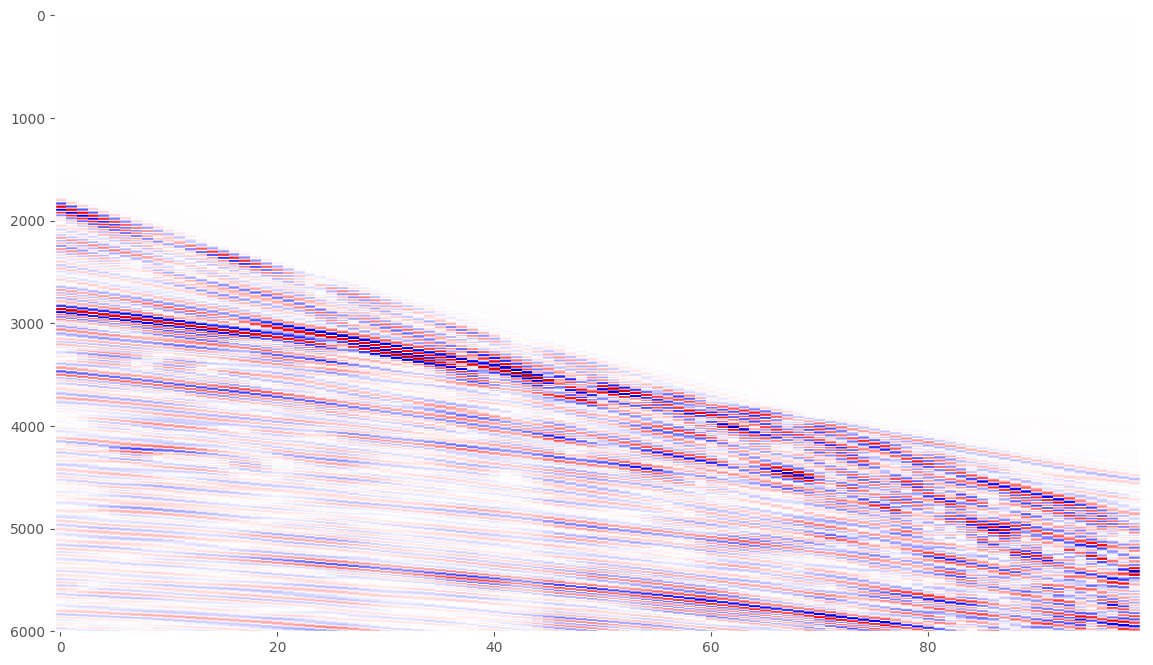

In [18]:
proj.out.synth.plot(norm='rms')

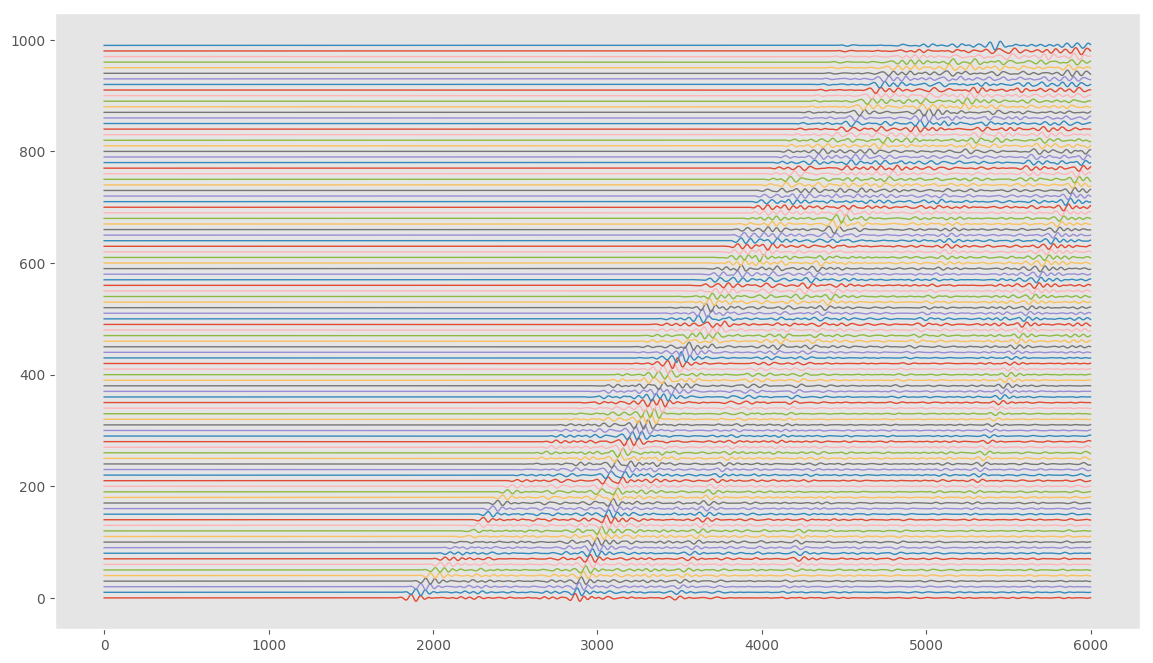

In [17]:
proj.out.synth.plot(ptype='wiggle', norm='rms')

## (p08) 2 srcs, 100 recs

In [ ]:
# for 2 shots (=> 3 processes)
# err if 1 omp as expected
# 36 s with 3 or 4 ompthreads or 8 omp (no diff as expected, more than 2 slaves -> some are idle)
# 117 s with 2 omphtreads !!!!

In [6]:
# p08_sp_kwargs = {'geometry': 'regular', 'geometry_in_nodes': False,
#                  'souz': 12.5, 'recz': 12.5, 'soux0': 500, 'recx0': 3000,
#                  'soudx': 100, 'recdx': 50, 'sounx': sounx, 'recnx': recnx, 'cat': 0}

In [18]:
proj = ProjSynVsObs('p08', io='sgy', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)
# sounx = 2
# recnx = 100

INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p08/
INFO:fullwavepy.project.projaux.ProjDef.__init__: 
-----------------------------------------
Project definition
-----------------------------------------
problem             :           synthetic
domain              :                time
dim                 :                  3d
equation            :            acoustic
anisotropy          :                none
kernel              :                 low
io                  :                 sgy
qp                  :                   0
qs                  :                   0
INFO:fullwavepy.project.projaux.ProjSegyMapp.__init__: Setting SEG-Y header mapping to Fullwave's default
INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster


INFO:fullwavepy.project.projaux.ProjGeometry._set_discret: Searching for grid dimensions in kwargs, ./p08//inp/p08-SegyPrep.key, ./p08//inp/p08-Runfile.key


In [11]:
proj.inp.truevp.prepare(source=truevp)
proj.inp.rawsign.prepare(source=rawsign)
proj.inp.sp.prepare(**p08_sp_kwargs)
proj.inp.sp.run(cat=0)
proj.inp.runfile.prepare(cat=0)
proj.inp.bash.prepare(ompthreads=3, cat=0)
# proj.inp.pbs.prepare(select=1, mpiprocs=32, q='general', cat=1)
proj.run(timer=1, cat=0)

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p08/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: synthetic
io: sgy
kernel: low
domain: time
dim: 3D
equation: acoustic
anisotropy: none
qp: False
qs: False



INFO:fullwavepy.project.gridfiles.ModelFileSgy.resize: Header dt > 1000. Assuming miliseconds or milimetres


INFO:fullwavepy.project.runfiles.SegyPrepFile.create: Expecting regular geometry specified in metres
INFO:fullwavepy.project.runfiles.SegyPrepFile.run: Running SegyPrep...
INFO:fullwavepy.project.runfiles.Runfile.create: Setting boundary conditions...


INFO:fullwavepy.project.projtypes.Proj.run: Running Fullwave3D...


mv: cannot stat 'p08-*CP*': No such file or directory



Function run took 36.32709501218051 s to run


## (p10) 2 srcs, 100 recs, cx1

In [6]:
proj = ProjSynVsObs('p10', io='sgy', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p10/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: synthetic
io: sgy
kernel: low
domain: time
dim: 3D
equation: acoustic
anisotropy: none
qp: False
qs: False



In [29]:
proj.inp.truevp.prepare(source=truevp)
proj.inp.rawsign.prepare(source=rawsign)
proj.inp.sp.prepare(**p08_sp_kwargs)
proj.inp.sp.run(cat=0)
proj.inp.runfile.prepare(cat=0)
proj.inp.pbs.prepare(select=1, mpiprocs=4, q='pqmrwarn', cat=1)

INFO:fullwavepy.project.gridfiles.ModelFileSgy.resize: Header dt > 1000. Assuming miliseconds or milimetres


INFO:fullwavepy.project.runfiles.SegyPrepFile.create: Expecting regular geometry specified in metres
INFO:fullwavepy.project.runfiles.SegyPrepFile.run: Running SegyPrep...
INFO:fullwavepy.project.runfiles.Runfile.create: Setting boundary conditions...


INFO:fullwavepy.ioapi.cx1.PbsFileCx1._set_resources: Queue selected: pqmrwarn
INFO:fullwavepy.project.runfiles.PbsFile._create_verbosity_triggers: Creating ./p10//inp/fullwave3d-verbose-scheduler
INFO:fullwavepy.project.runfiles.PbsFile._create_verbosity_triggers: Creating fullwave3d-verbose-slave-? for each mpiproc
Content of  ./p10//inp/p10-Run.pbs : 
#!/bin/bash

##
# For more explanation, see help(fullwavepy.project.runfiles.PbsFile).
#
##

#PBS -N p10
#PBS -o p10-JobOut.log
#PBS -e p10-JobErr.log
#PBS -l walltime=01:00:00
#PBS -l select=1:mpiprocs=4:ompthreads=10:ncpus=40:mem=128gb
#PBS -l place=scatter:excl

start=`date +%s`

# PATHS
code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
echo 'code_path: '${code_path}
this_dir=$PBS_O_WORKDIR
work_dir=$TMPDIR
cd $this_dir/../inp/ # THIS ASSUMES LAUNCHING FROM proj/out (as is done by fwi_qsub.sh)

# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset NCPUS
export I_MPI_PIN=no # (DOES NOT WORK IF RU

In [24]:
# proj.out.job_out.cat()

## (p12) More sources

In [6]:
proj = ProjSynVsObs('p12', io='sgy', dims=dims, dx=dx, dt=dt, ns=6000, exe=exe)

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p12/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: synthetic
io: sgy
kernel: low
domain: time
dim: 3D
equation: acoustic
anisotropy: none
qp: False
qs: False



In [11]:
# proj.out.synth.gather

In [7]:
# # proj.inp.truevp.prepare(source=truevp)
# # proj.inp.truevp.plot(cbar=1)
# proj.inp.rawsign.prepare(source=rawsign)
# kwargs12 = {'geometry': 'regular', 'geometry_in_nodes': True,
#             'souz': 30, 'recz': 40, 'soux0': 50, 'recx0': 25,
#             'soudx': 100, 'recdx': 30, 'sounx': 14, 'recnx': 50}
# proj.inp.sp.prepare(**kwargs12, cat=0)
# proj.inp.sp.run(cat=0)
# proj.inp.s.cat()
# proj.inp.runfile.prepare(cat=0)
# proj.inp.bash.prepare(ompthreads=8, cat=0)
# # proj.run(timer=1, cat=0)

# Inversion

## 1 source

- no agc dumps even if requested for...

In [32]:
# !su_range.sh {dupl+'/out/'+dupl+'-Synthetic.sgy'}

In [8]:
proj = ProjInv('p05', io='sgy', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)
# dupl = 'p04'
# proj.inp.obser.prepare(source=dupl+'/out/'+dupl+'-Synthetic.sgy')
# proj.inp.obser.plot()
# proj.inp.rawsign.prepare(source=dupl+'/inp/'+dupl+'-RawSign.sgy')
# proj.inp.rawsign.plot()
# proj.inp.startvp.prepare(source=dupl+'/inp/'+dupl+'-TrueVp.sgy')
# proj.inp.startvp.plot()
# HEADERS OF Synthetic AND OutSeis ARE BUGGY!!!
# proj.inp.rawseis.prepare(fnames=['../../'+dupl+'/out/'+dupl+'-Synthetic.sgy'])

# proj.inp.sp.prepare(geometry='regular', geometry_in_nodes=False,
#                         souz=12.5, recz=12.5, soux0=500, recx0=3000,
#                         soudx=100, recdx=50, sounx=1, recnx=1)
# proj.inp.sp.run()
# proj.inp.s.cat()
# proj.inp.r.cat()
# proj.inp.runfile.prepare(blocks=[{'freq': 4.0, 'nits': 2}, 
#                                  {'freq': 5.0, 'nits': 2}])
# proj.inp.bash.prepare()
# proj.inp.bash.cat()
# proj.inp.check()
# proj.run()
# proj.ls()
# proj.out.log()

# for vp in proj.out.vp.it:
#     plt.figure()
#     vp.plot()

INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p05/


INFO:fullwavepy.project.projaux.ProjDef.__init__: 
-----------------------------------------
Project definition
-----------------------------------------
problem             :          tomography
domain              :                time
dim                 :                  3d
equation            :            acoustic
anisotropy          :                none
kernel              :                 low
io                  :                 sgy
qp                  :                   0
qs                  :                   0


INFO:fullwavepy.project.projaux.ProjSegyMapp.__init__: Setting Fullwave default SEG-Y mapping
INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster


INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting first 1  trace(s) as source-wavelet(s)
INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting next 1  trace(s) as observed data


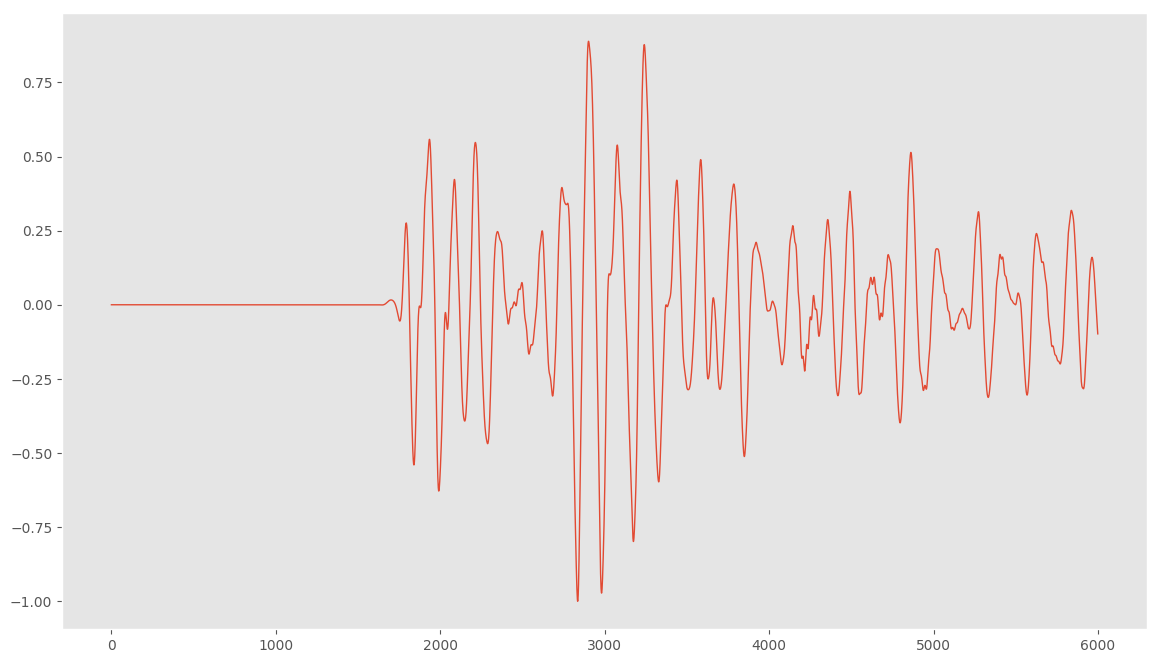

In [17]:
proj.out.dumpdat.it[1][1][1].plot(ptype='wiggle', norm='max')

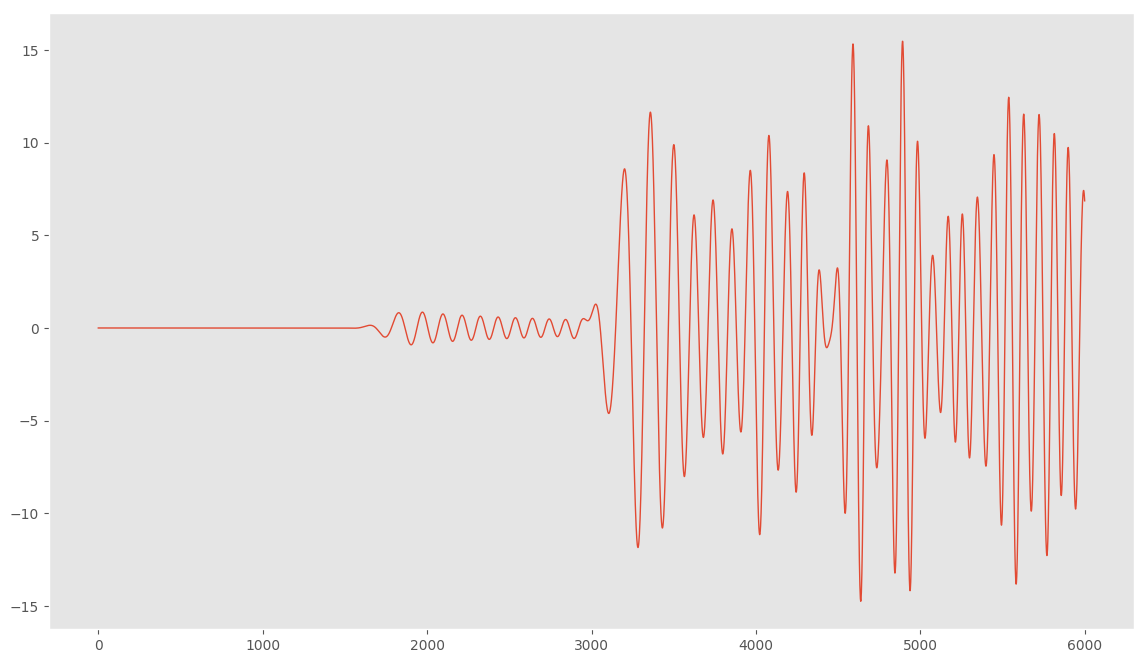

In [35]:
proj.inp.obser.plot()

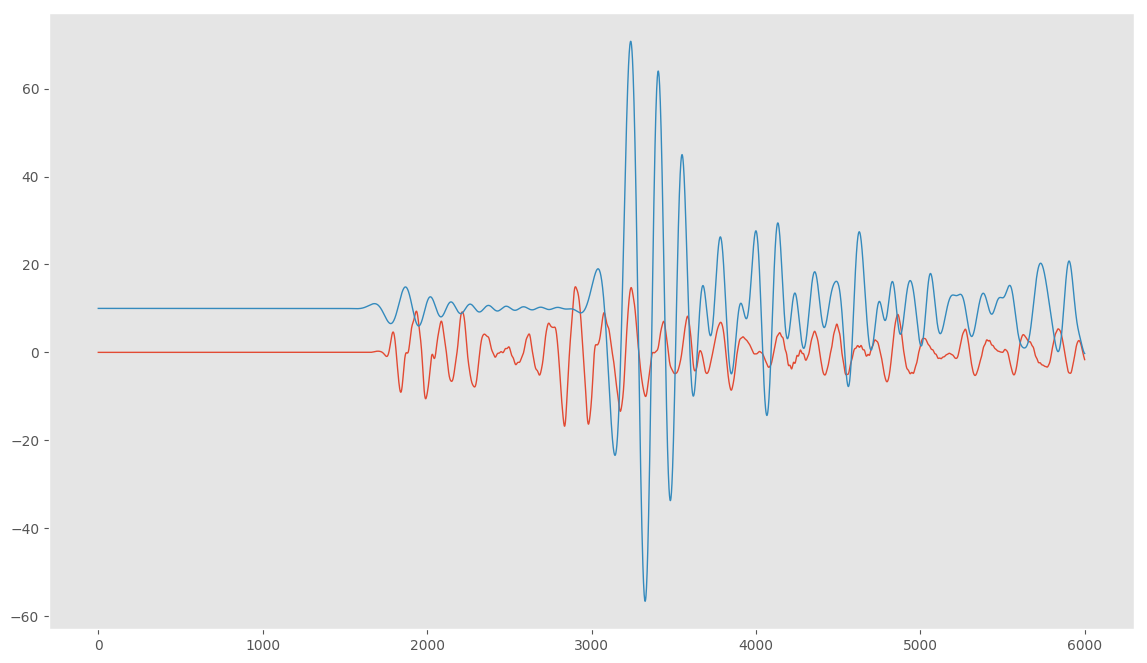

In [16]:
plot('p05/out/p05-SLAVES_DUMPLOWPASS-B4-csref00001-iter00001fwd1.ttr', ptype='wiggle')

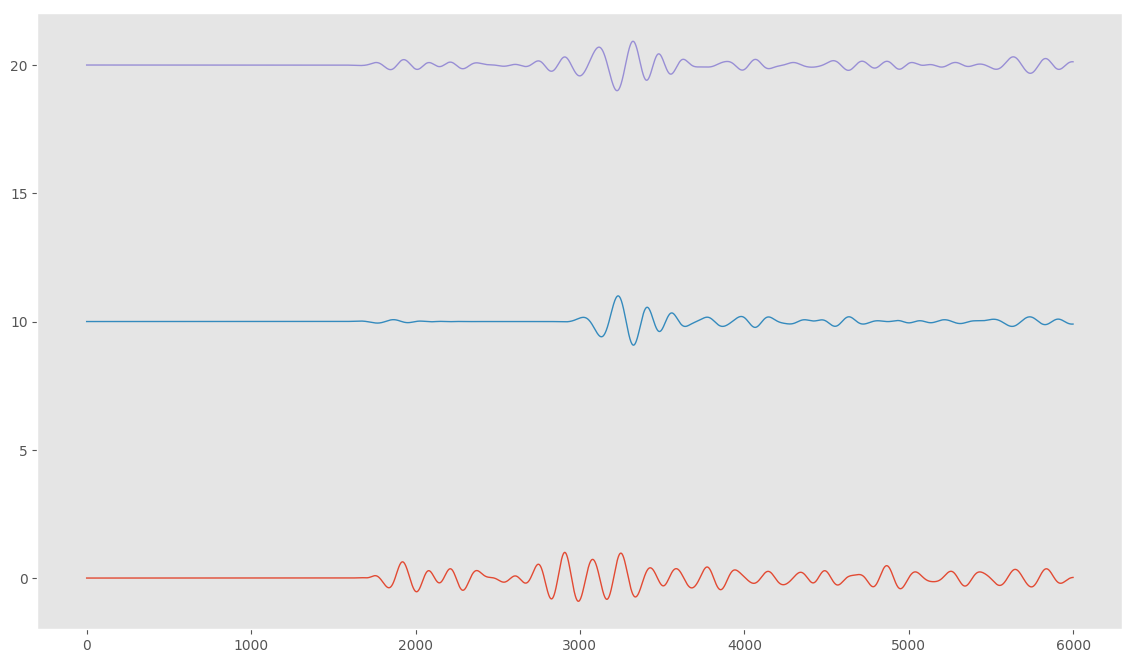

In [40]:
plot('p05/out/p05-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr', ptype='wiggle', norm='max')

In [43]:
# proj.inp.bash.cat()

## 1 src, 10 recs

In [53]:
recnx = 100
proj = ProjInv('p07', io='sgy', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)
# proj.inp.sp.prepare(geometry='regular', geometry_in_nodes=False,
#                         souz=12.5, recz=12.5, soux0=500, recx0=3000,
#                         soudx=100, recdx=50, sounx=1, recnx=recnx, cat=0) #source=sp)

dupl = 'p06'
# proj.inp.obser.prepare(source=dupl+'/out/'+dupl+'-Synthetic.sgy')
# proj.inp.obser.plot()
# proj.inp.rawsign.prepare(source=dupl+'/inp/'+dupl+'-RawSign.sgy')
# proj.inp.rawsign.plot()
# proj.inp.startvp.prepare(source=dupl+'/inp/'+dupl+'-TrueVp.sgy')
# proj.inp.startvp.plot()
# HEADERS OF Synthetic AND OutSeis ARE BUGGY!!!
# proj.inp.rawseis.prepare(fnames=['../../'+dupl+'/out/'+dupl+'-Synthetic.sgy'])

# proj.inp.sp.prepare(geometry='regular', geometry_in_nodes=False,
#                         souz=12.5, recz=12.5, soux0=500, recx0=3000,
#                         soudx=100, recdx=50, sounx=1, recnx=recnx, cat=0) #source=sp)

# proj.inp.sp.run()
# proj.inp.s.cat()
# proj.inp.r.cat()
# proj.inp.runfile.prepare(blocks=[{'freq': 4.0, 'nits': 1}])
# proj.inp.bash.prepare()
# proj.inp.bash.cat()
# !cd p07/inp; cp p07-Template.idx p07-Observed.idx
# proj.inp.check()
# proj.run()
# proj.ls()
# proj.out.log()


INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p07/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: tomography
io: sgy
kernel: low
domain: time
dim: 3D
equation: acoustic
anisotropy: none
qp: False
qs: False



INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting first 1  trace(s) as source-wavelet(s)
INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting next 100  trace(s) as observed data


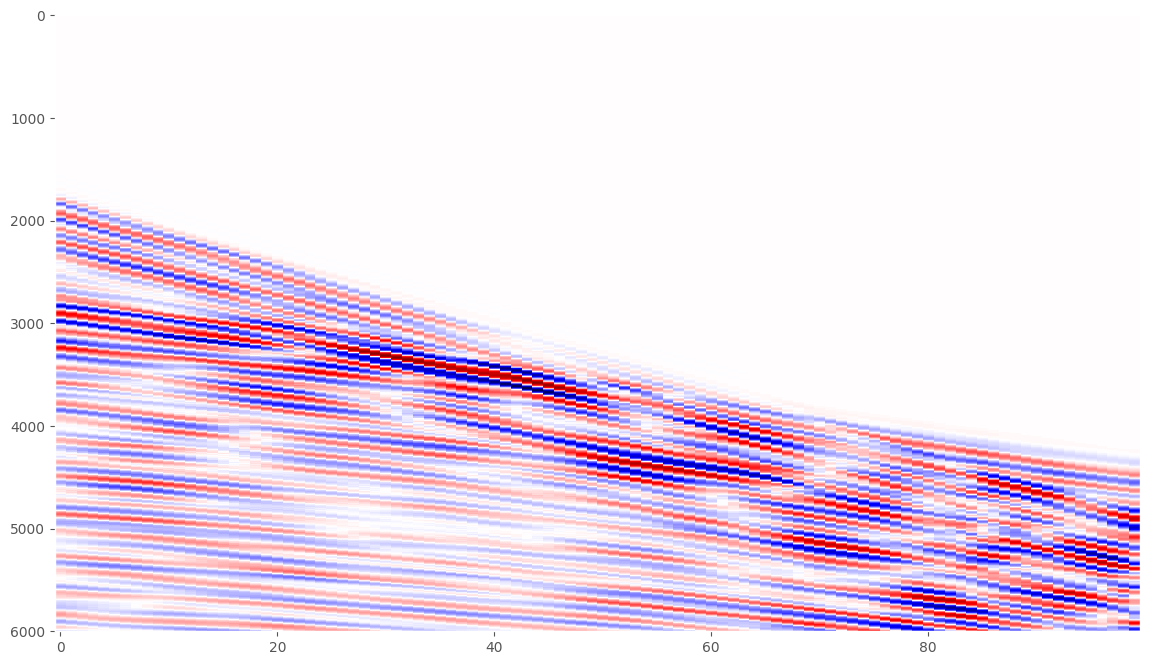

In [57]:
proj.out.dumpdat.it[1][1][2].plot(norm='rms')

INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting first 1  trace(s) as source-wavelet(s)
INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting next 100  trace(s) as observed data


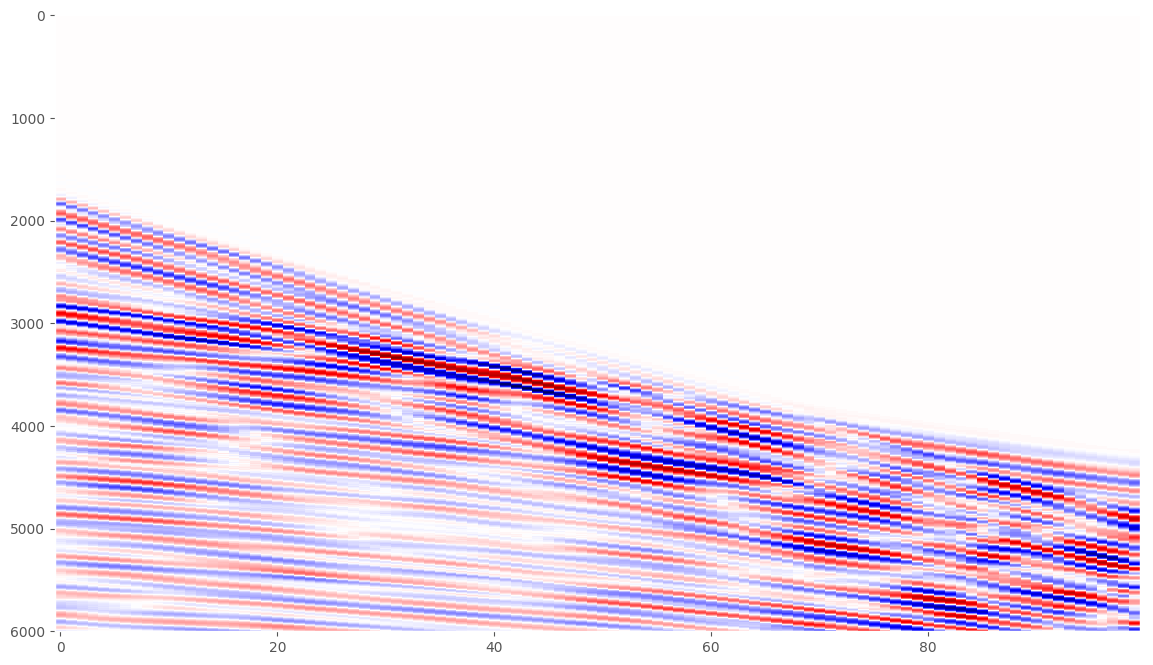

In [56]:
proj.out.dumpdat.it[1][1][1].plot(norm='rms')

## 2 srcs, 100 recs

- it took only 103 sec (1 iteration) - 3 times as much as synthetic run

In [11]:
proj = ProjInv('p09', io='sgy', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)

INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p09/


INFO:fullwavepy.project.projaux.ProjDef.__init__: 
-----------------------------------------
Project definition
-----------------------------------------
problem             :          tomography
domain              :                time
dim                 :                  3d
equation            :            acoustic
anisotropy          :                none
kernel              :                 low
io                  :                 sgy
qp                  :                   0
qs                  :                   0


INFO:fullwavepy.project.projaux.ProjSegyMapp.__init__: Setting Fullwave default SEG-Y mapping
INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster


In [13]:
proj.inp.obs.surange()

3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00610386 s, 524 kB/s
 200 traces:
tracl    1 200 (1 - 200)
tracr    1 200 (1 - 200)
fldr     1 2 (1 - 2)
tracf    1 100 (1 - 100)
ep       1 2 (1 - 2)
cdp      1
cdpt     1
trid     1
nvs      1
nhs      1
duse     1
offset   2400 7450 (2500 - 7350)
gelev    -13
sdepth   13
scalel   1
scalco   1
sx       500 600 (500 - 600)
gx       3000 7950 (3000 - 7950)
counit   1
ns       6000
dt       1000

Shot coordinate limits:
	North(500,0) South(500,0) East(600,0) West(500,0)

Receiver coordinate limits:
	North(3000,0) South(3000,0) East(7950,0) West(3000,0)

Midpoint coordinate limits:
	North(1750,0) South(1750,0) East(4275,0) West(1750,0)



In [17]:
dupl = 'p08'
proj.inp.obser.prepare(source=dupl+'/out/'+dupl+'-Synthetic.sgy')
proj.inp.rawsign.prepare(source=dupl+'/inp/'+dupl+'-RawSign.sgy')
proj.inp.startvp.prepare(source=dupl+'/inp/'+dupl+'-TrueVp.sgy')
proj.inp.sp.prepare(**p08_sp_kwargs)
proj.inp.sp.run(cat=0)
proj.inp.runfile.prepare(blocks=[{'freq': 4.0, 'nits': 1}], cat=0)
proj.inp.bash.prepare(ompthreads=3, cat=0)
!cd {proj.inp.path}; cp {proj.name}-Template.idx {proj.name}-Observed.idx
proj.inp.check()
proj.run(timer=1)

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p09/
INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: tomography
io: sgy
kernel: low
domain: time
dim: 3D
equation: acoustic
anisotropy: none
qp: False
qs: False



INFO:fullwavepy.project.gridfiles.ModelFileSgy.resize: Header dt > 1000. Assuming miliseconds or milimetres


INFO:fullwavepy.project.runfiles.SegyPrepFile.create: Expecting regular geometry specified in metres
INFO:fullwavepy.project.runfiles.SegyPrepFile.run: Running SegyPrep...
INFO:fullwavepy.project.runfiles.Runfile.create: Setting boundary conditions...
+++++++++++++++ Will only check input files and dump canonical runfile ++++++++++++++++
---=== Starting run (host: ese-kajetan) on 2019/10/09, 00:57:02 ===---
executable: fullwave3D.exe, version: unknown, release date: 2019-10-05
=== scheduler_getprojargs: Project name (command-line argument): "p09"
=== setup_probtype: Equation: "acoustic", Anisotropy: "none", Domain: "time", Kernel: "low"
    read_runfile: number of iteration blocks in "p09-Runfile.key": 1
    read_runfile: total time given in "p09-Runfile.key": 6.00000000 seconds
+++ update_runfile: WARNING: Runfile said 3D, but got NX2=1 - ASSUMING 2D!!
    scheduler_readinput: Grid dimensions (Length x Width x Depth): 1461x1x333 cells
    read_modelprop: Got Vp model from "p09-StartVp

mv: cannot stat 'p09-*Synthetic*': No such file or directory
mv: cannot stat 'p09-*Observed-Time*': No such file or directory
mv: cannot stat 'p09-*iter*': No such file or directory



Function run took 103.52518973685801 s to run


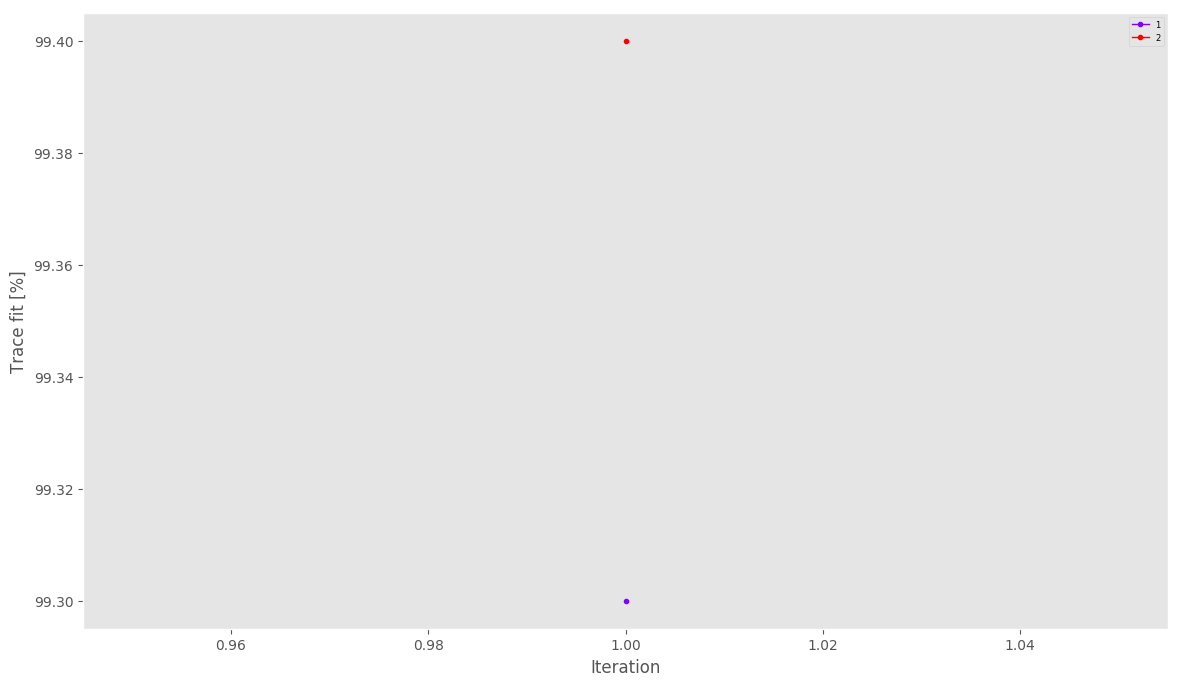

In [24]:
proj.out.functional.plot()

In [17]:
s1 = proj.out.dumpdat.it[1][1][1].read(scoord=None)

INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting first trace (the source wavelet)
INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting next 100  trace(s) as observed data


In [21]:
s2 = proj.out.dumpdat.it[1][1][2].read(scoord=None)

INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting first trace (the source wavelet)
INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting next 100  trace(s) as observed data


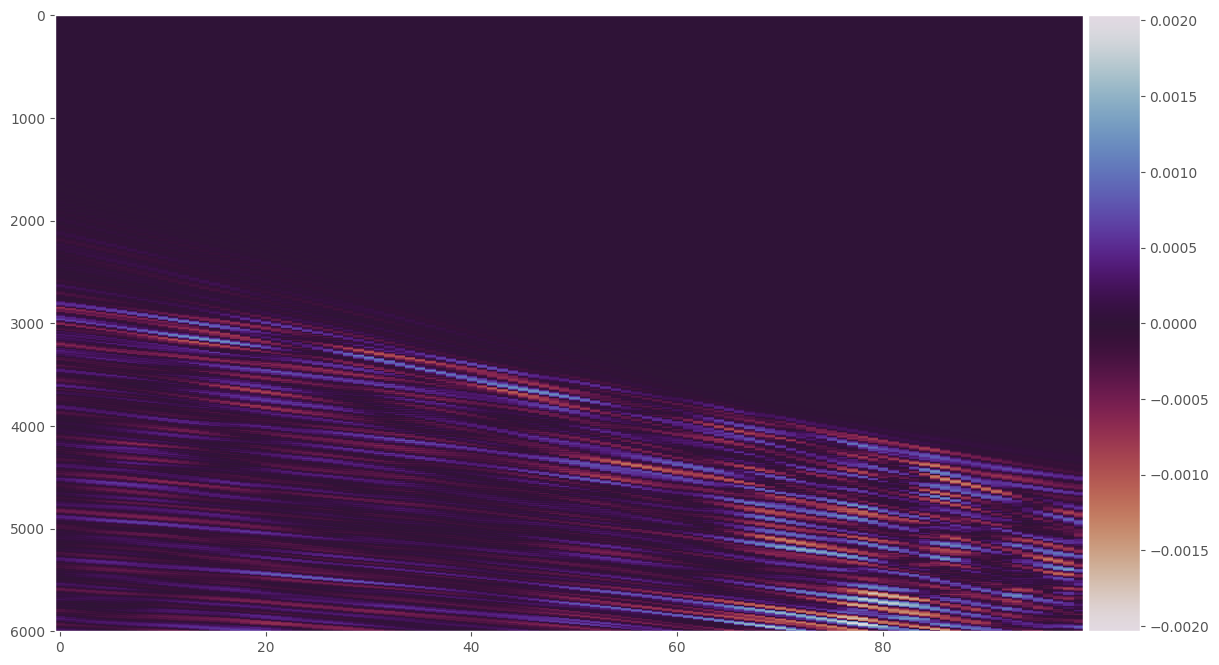

In [22]:
plot(s1-s2, cbar=1)

In [19]:
# proj.ls()

## (p11) 2 srcs, 100 recs, cx1

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p11/


INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: tomography
io: sgy
kernel: low
domain: time
dim: 3D
equation: acoustic
anisotropy: none
qp: False
qs: False



INFO:fullwavepy.project.datafiles.DumpCompareFile._get_sr_coords: Assuming that file ./p11//out/p11-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr contains all receivers


INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


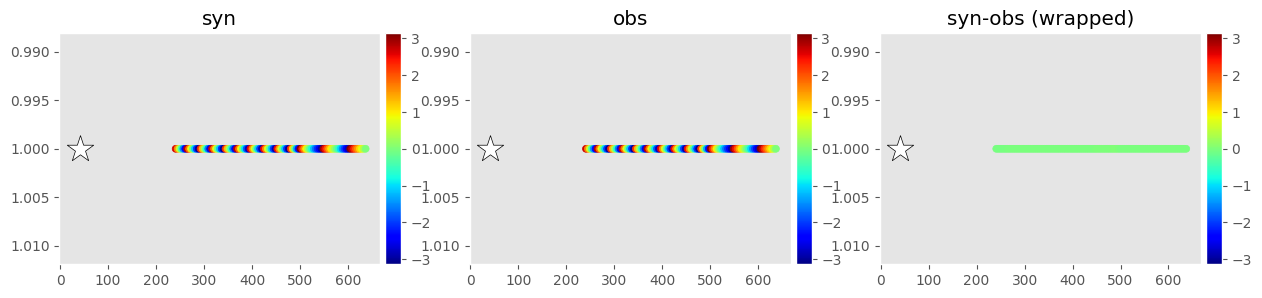

In [9]:
proj = ProjInv('p11', io='sgy', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe)
proj.out.dumpcomp.it[1][1].plot_phase(5)

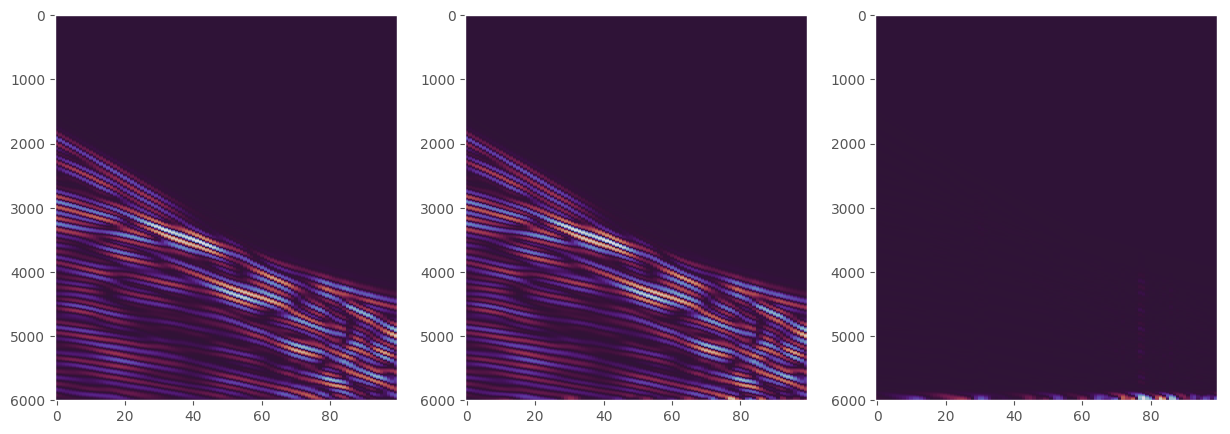

In [44]:
proj.out.dumpcomp.it[1][1].plot()

In [8]:
dupl = 'p08'
proj.inp.obser.prepare(source=dupl+'/out/'+dupl+'-Synthetic.sgy')
proj.inp.rawsign.prepare(source=dupl+'/inp/'+dupl+'-RawSign.sgy')
proj.inp.startvp.prepare(source=dupl+'/inp/'+dupl+'-TrueVp.sgy')
proj.inp.sp.prepare(**p08_sp_kwargs)
proj.inp.sp.run(cat=0)
proj.inp.runfile.prepare(blocks=[{'freq': 4.0, 'nits': 1}], cat=0)
# proj.inp.bash.prepare(ompthreads=3, cat=0)
proj.inp.pbs.prepare(select=2, mpiprocs=4, q='pqmrwarn', cat=1)
!cd {proj.inp.path}; cp {proj.name}-Template.idx {proj.name}-Observed.idx

INFO:fullwavepy.project.gridfiles.ModelFileSgy.resize: Header dt > 1000. Assuming miliseconds or milimetres


INFO:fullwavepy.project.runfiles.SegyPrepFile.create: Expecting regular geometry specified in metres
INFO:fullwavepy.project.runfiles.SegyPrepFile.run: Running SegyPrep...
INFO:fullwavepy.project.runfiles.Runfile.create: Setting boundary conditions...
INFO:fullwavepy.ioapi.cx1.PbsFileCx1._set_resources: Queue selected: pqmrwarn
INFO:fullwavepy.project.runfiles.PbsFile._create_verbosity_triggers: Creating ./p11//inp/fullwave3d-verbose-scheduler
INFO:fullwavepy.project.runfiles.PbsFile._create_verbosity_triggers: Creating fullwave3d-verbose-slave-? for each mpiproc
Content of  ./p11//inp/p11-Run.pbs : 
#!/bin/bash

##
# For more explanation, see help(fullwavepy.project.runfiles.PbsFile).
#
##

#PBS -N p11
#PBS -o p11-JobOut.log
#PBS -e p11-JobErr.log
#PBS -l walltime=01:00:00
#PBS -l select=2:mpiprocs=4:ompthreads=10:ncpus=40:mem=128gb
#PBS -l place=scatter:excl

start=`date +%s`

# PATHS
code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
echo 'code_path: '${code_path}
this_dir=$PBS_O_

In [12]:
!cat {proj.out.job_out.fname}

code_path: /rds/general/user/kmc3817/home/PhD/fullwave3D/rev690/bin/fullwave3D.exe
Exit status: 0
Runtime of the PBS script: 39 s


        Job resource usage summary 

                 Memory (GB)    NCPUs
 Requested  :       256            80
 Used       :         0 (peak)   0.07 (ave)



## (p13) More sources

In [37]:
proj = ProjInv('p13', io='sgy', dim='2D', dims=dims, dx=dx, dt=dt, ns=6000, exe=exe)

INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p13/


INFO:fullwavepy.project.projaux.ProjDef.__init__: Project definition:
problem: tomography
io: sgy
kernel: low
domain: time
dim: 2D
equation: acoustic
anisotropy: none
qp: False
qs: False



In [42]:
# proj.out.dumpcomp.it[1][1].plot()

In [23]:
dupl = 'p12'
proj.inp.obser.prepare(source=dupl+'/out/'+dupl+'-Synthetic.sgy')
proj.inp.rawsign.prepare(source=dupl+'/inp/'+dupl+'-RawSign.sgy')
proj.inp.startvp.prepare(source=startvp)
proj.inp.sp.prepare(**kwargs12, cat=0)
proj.inp.sp.run(cat=0)
proj.inp.runfile.prepare(blocks=[{'freq': 3.0, 'nits': 10},
                                 {'freq': 3.5, 'nits': 10},
                                 {'freq': 4.0, 'nits': 10},
                                 {'freq': 4.5, 'nits': 10},
                                 {'freq': 5.0, 'nits': 10}], cat=0)
proj.inp.bash.prepare(ompthreads=8, cat=0)
!cd {proj.inp.path}; cp {proj.name}-Template.idx {proj.name}-Observed.idx
# proj.inp.check()
# proj.run(timer=1)

In [33]:
# proj.inp.s.plot('node')
# proj.inp.r.plot('node')

In [70]:
# proj.inp.pbs.prepare(select=5, mpiprocs=10, cat=1)

INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting first trace (the source wavelet)
INFO:fullwavepy.project.datafiles.DumpDataFile.read: Ommiting next 47  trace(s) as observed data


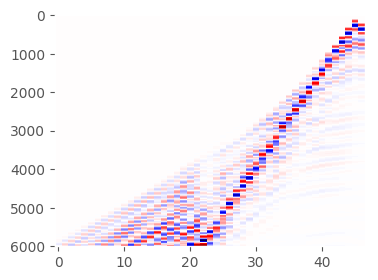

In [13]:
proj.out.dumpdat.it[1][14][1].plot()

In [19]:
# proj.inp.startvp.plot()

(0, 10)

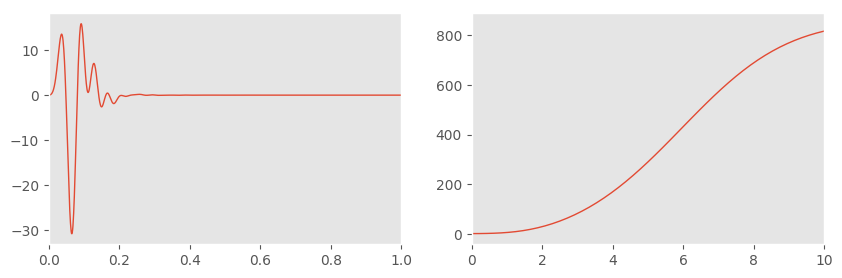

In [37]:
plt.subplots(1,2, figsize=[10,3])
plt.subplot(1,2,1)
proj.inp.rawsign.plot(dt=dt)
plt.xlim(0,1)
plt.subplot(1,2,2)
proj.inp.rawsign.plot(spect='ampl', dt=dt)
plt.xlim(0,10)

INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


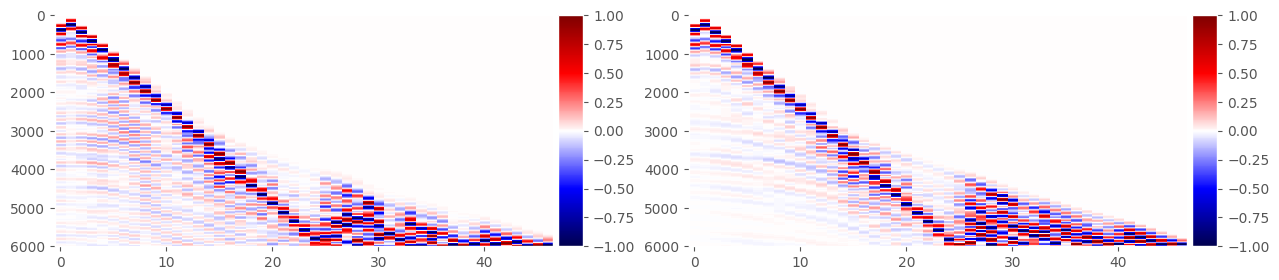

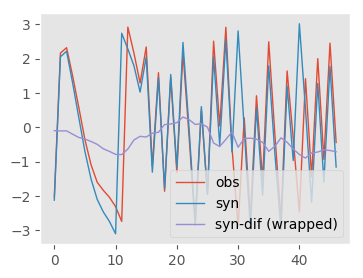

In [41]:
A = read_any(proj.out.dumpdat.it[1][1][1].fname)
A = A[1: ]
imid = int(len(A) / 2)
Aobs = A[ :imid]
Asyn = A[imid: ]
norm = 'max'
plt.subplots(1,2, figsize=[15,3])
plt.subplot(1,2,1)
plot(Aobs, cmap='seismic', norm=norm, cbar=1)
plt.subplot(1,2,2)
plot(Asyn, cmap='seismic', norm=norm, cbar=1)

freq = 5
picks = first_breaks(Asyn, fraction=1e-2) # only from syn
phobs = extract_phase(Aobs, picks, dt, freq).ravel()
phsyn = extract_phase(Asyn, picks, dt, freq).ravel()
phdif = [wrap_phase(i) for i in phsyn-phobs]
plt.figure()
plt.plot(phobs, label='obs')
plt.plot(phsyn, label='syn')
plt.plot(phdif, label='syn-dif (wrapped)')
plt.legend()

INFO:fullwavepy.signalproc.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


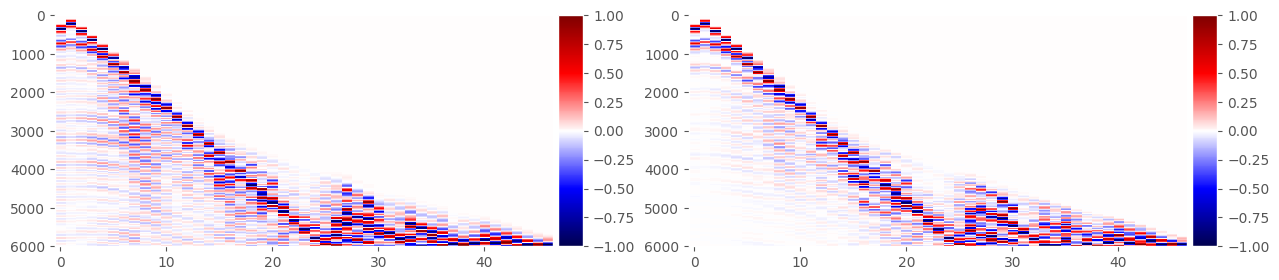

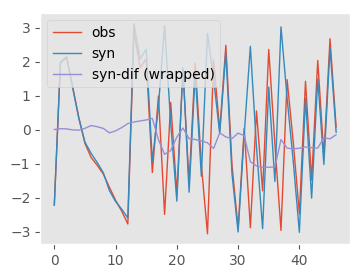

In [44]:
A = read_any(proj.out.dumpdat.it[50][1][1].fname)
A = A[1: ]
imid = int(len(A) / 2)
Aobs = A[ :imid]
Asyn = A[imid: ]
norm = 'max'
plt.subplots(1,2, figsize=[15,3])
plt.subplot(1,2,1)
plot(Aobs, cmap='seismic', norm=norm, cbar=1)
plt.subplot(1,2,2)
plot(Asyn, cmap='seismic', norm=norm, cbar=1)

freq = 5
picks = first_breaks(Asyn, fraction=1e-2) # only from syn
phobs = extract_phase(Aobs, picks, dt, freq).ravel()
phsyn = extract_phase(Asyn, picks, dt, freq).ravel()
phdif = [wrap_phase(i) for i in phsyn-phobs]
plt.figure()
plt.plot(phobs, label='obs')
plt.plot(phsyn, label='syn')
plt.plot(phdif, label='syn-dif (wrapped)')
plt.legend()

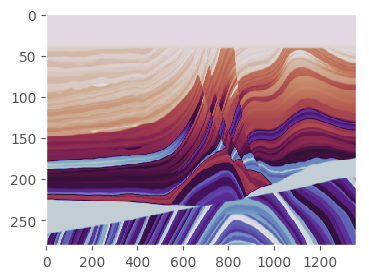

In [48]:
plot('p12/inp/p12-TrueVp.sgy', center_cmap=0)

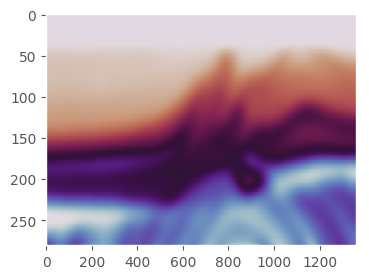

In [53]:
proj.out.vp.it[0].plot()

In [50]:
for i in range(0, 51, 10):
    proj.out.vp.it[i].plot()
    plt.savefig('vp' + str(i).rjust(3,'0'))
    plt.close()

In [87]:
# proj.inp.startvp.plot()

In [19]:
# plot('p12/inp/p12-TrueVp.sgy', center_cmap=0)

In [20]:
# plot('p13/out/p13-CP00050-Vp.sgy', center_cmap=0)

## (p15) All sources

In [7]:
env = {'SLAVES_DUMPCOMPARE': None, 'SLAVES_DUMPCSREFS': '1,81,161'}
proj = ProjInv('p15', io='sgy', dim='2D', dims=dims, dx=dx, dt=dt, ns=ns, exe=exe, env=env)

INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p15/
INFO:fullwavepy.project.projaux.ProjDef.__init__: 
-----------------------------------------
Project definition
-----------------------------------------
problem             :          tomography
domain              :                time
dim                 :                  2D
equation            :            acoustic
anisotropy          :                none
kernel              :                 low
io                  :                 sgy
qp                  :                   0
qs                  :                   0
INFO:fullwavepy.project.projaux.ProjSegyMapp.__init__: Setting SEG-Y header mapping to Fullwave's default
INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster


INFO:fullwavepy.project.projaux.ProjGeometry._set_discret: Searching for grid dimensions in kwargs, ./p15//inp/p15-SegyPrep.key, ./p15//inp/p15-Runfile.key


In [8]:
proj.out.vp.iplot(imax=140, istep=20)

interactive(children=(IntSlider(value=0, description='i', max=4), Dropdown(description='cmap', options=('infer…

aaar ./p15//inp/p15-StartVp.sgy


None

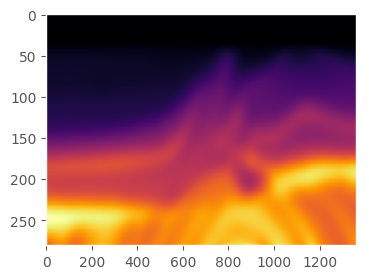

In [12]:
a

In [29]:
dupl = 'p03'
proj.inp.obser.prepare(source=dupl+'/out/'+dupl+'-Synthetic.sgy')
proj.inp.rawsign.prepare(source=dupl+'/inp/'+dupl+'-RawSign.sgy')
proj.inp.startvp.prepare(source=startvp)
proj.inp.sp.prepare(source=sp, cat=0)
proj.inp.sp.run(cat=0)
proj.inp.runfile.prepare(blocks=[{'freq': 3.0, 'nits': 12},
                                 {'freq': 3.5, 'nits': 12},
                                 {'freq': 4.2, 'nits': 12},
                                 {'freq': 4.5, 'nits': 12},
                                 {'freq': 5.0, 'nits': 12},
                                 {'freq': 6.0, 'nits': 12},
                                 {'freq': 7.5, 'nits': 12},
                                 {'freq': 9.5, 'nits': 12},
                                 {'freq': 12.0, 'nits': 12},
                                 {'freq': 15.0, 'nits': 12},
                                 {'freq': 20.0, 'nits': 12}], cat=0)
proj.inp.bash.prepare(ompthreads=8, cat=0)
!cd {proj.inp.path}; cp {proj.name}-Template.idx {proj.name}-Observed.idx
!cd {proj.inp.path}; cp {proj.name}-Template.hed {proj.name}-Observed.hed
proj.inp.pbs.prepare(hours=8, select=4, mpiprocs=8, q='general')

In [10]:
proj.env['SLAVES_DUMPDAT'] = None
proj.env['SLAVES_DUMPCSREFS'] = '1,81,161'

In [11]:
# RESTARTING (DON'T NEED TO USE CPNUM, LastCheckout.txt IS ENOUGH)
proj
proj.inp.pbs.prepare(hours=10, select=16, mpiprocs=8, q='general')

INFO:fullwavepy.ioapi.cx1.PbsFileCx1._set_resources: Queue selected: general
INFO:fullwavepy.project.runfiles.PbsFile._create_verbosity_triggers: Creating ./p15//inp/fullwave3d-verbose-scheduler
INFO:fullwavepy.project.runfiles.PbsFile._create_verbosity_triggers: Creating fullwave3d-verbose-slave-? for each mpiproc
Content of  ./p15//inp/p15-Run.pbs : 
#!/bin/bash

##
# For more explanation, see help(fullwavepy.project.runfiles.PbsFile).
#
##

#PBS -N p15
#PBS -o p15-JobOut.log
#PBS -e p15-JobErr.log
#PBS -l walltime=10:00:00
#PBS -l select=16:mpiprocs=8:ompthreads=4:ncpus=32:mem=62gb
#PBS -l place=scatter:excl

start=`date +%s`

# PATHS
code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
echo 'code_path: '${code_path}
this_dir=$PBS_O_WORKDIR
work_dir=$TMPDIR
cd $this_dir/../inp/ # ../inp. NEEDED IF RUN BY fwi_qsub.sh)

# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset NCPUS
export I_MPI_PIN=no # (DOES NOT WORK IF RUNNING ON A WHOLE NODE) 

# AR

In [11]:
len(proj.out.functional.read()['1'])

87

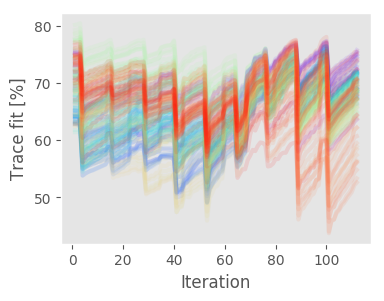

In [12]:
proj.out.functional.plot(ls='-', alpha=0.1)

In [50]:
srcs = proj.inp.s.read(unit='node')
recs = proj.inp.r.read(unit='node')

In [51]:
x, y, c = [], [], []
fun = proj.out.functional.read()
for sid, xyz in srcs.items():
    x.append(xyz[0])
    y.append(xyz[1])
    c.append(fun[sid])

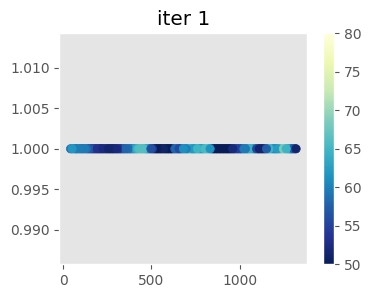

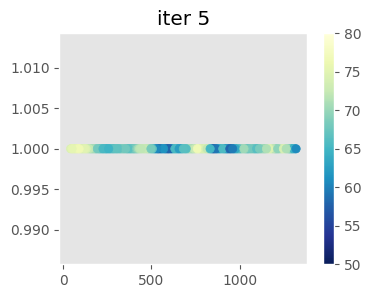

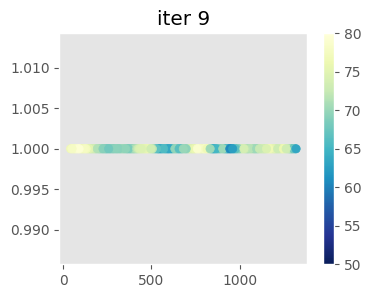

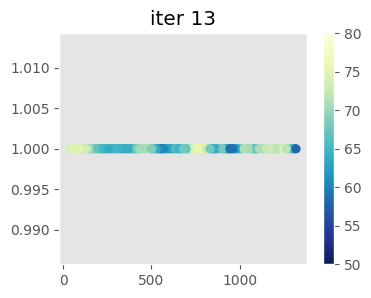

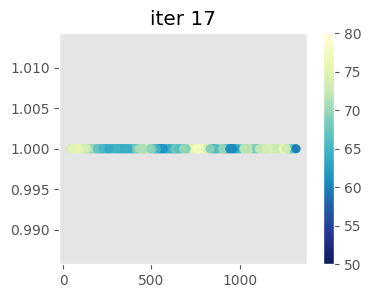

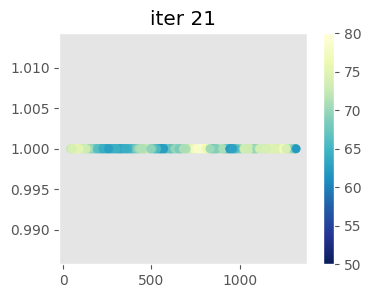

In [57]:
for it in range(0,21,4):
    plt.figure()
    plt.title('iter '+ str(it+1))
    plt.scatter(x,y, c=[i[it] for i in c], cmap='YlGnBu_r',vmin=50,vmax=80)
    plt.colorbar()

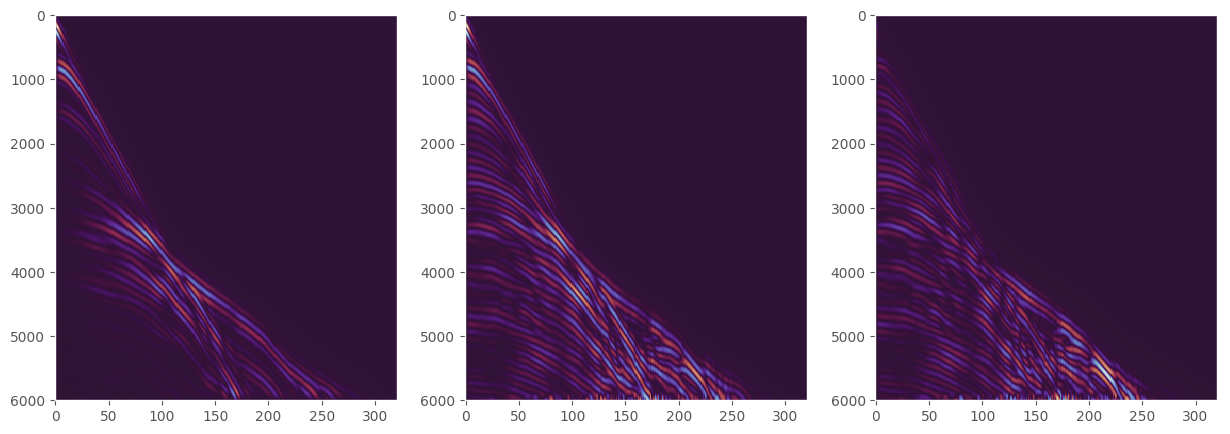

In [70]:
proj.out.dumpcomp.it[1][1].plot()

In [12]:
# proj.inp.r.read(unit='m')

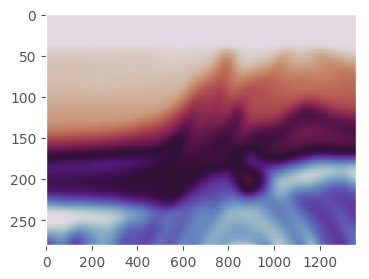

In [33]:
proj.out.vp.it[1].plot()

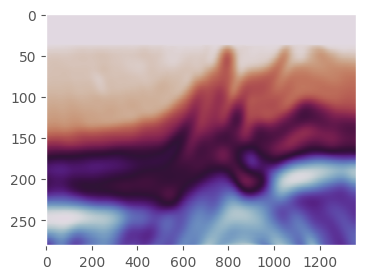

In [22]:
proj.out.vp.it[16].plot()

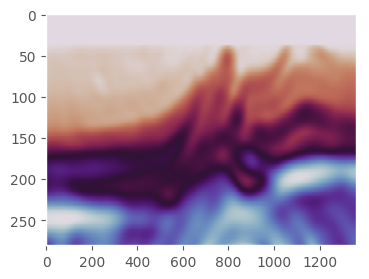

In [26]:
proj.out.vp.it[22].plot()

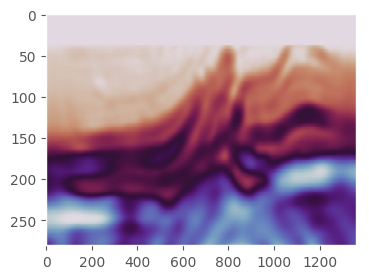

In [45]:
proj.out.vp.it[45].plot()

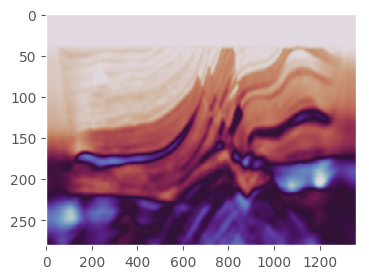

In [12]:
proj.out.vp.it[121].plot()

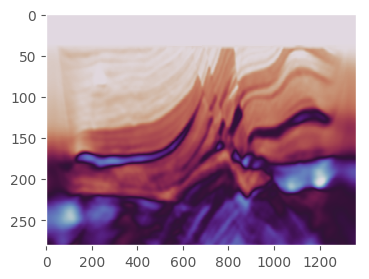

In [14]:
proj.out.vp.it[131].plot()

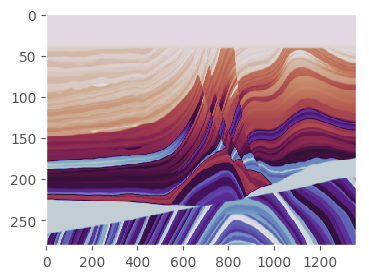

In [17]:
plot(truevp, center_cmap=0)

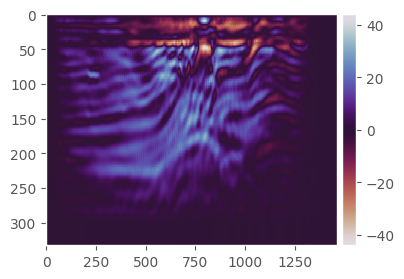

In [33]:
proj.out.grad.it[1].plot(cbar=1)

In [36]:
# proj.out.grad.plot_all(cbar=1)

## (p17) All sources - rerun first 21 iterations

In [9]:
env = {'SLAVES_DUMPCOMPARE': None, 'SLAVES_DUMPCSREFS': '1,81,161'}
proj = ProjInv('p17', exe=exe, env=env)

INFO:fullwavepy.project.projaux.ProjPath.__init__: Project path set to: ./p17/
INFO:fullwavepy.project.projaux.ProjDef.__init__: 
-----------------------------------------
Project definition
-----------------------------------------
problem             :          tomography
domain              :                time
dim                 :                  3d
equation            :            acoustic
anisotropy          :                none
kernel              :                 low
io                  :                 sgy
qp                  :                   0
qs                  :                   0
INFO:fullwavepy.project.projaux.ProjSegyMapp.__init__: Setting SEG-Y header mapping to Fullwave's default
INFO:fullwavepy.project.projtypes.Proj.__init__: PBS scripts will be prepared for the cx1 cluster
INFO:fullwavepy.project.textfiles.LastCheckpointFile.__init__: Last checkpoint: 29
INFO:fullwavepy.project.projaux.ProjGeometry._set_discret: Searching for grid dimensions in kwargs, ./

### Inp

In [46]:
# proj.inp.dupl('p15/inp', 'p15', cmd='ln')

In [8]:
# proj.inp.pbs.prepare(hours=8, select=4, mpiprocs=8, q='general')

### Out

## (p19) Same as p15, run on ephemeral

In [12]:
log_lvl(30)
env = {'SLAVES_DUMPCOMPARE': 'yes', 'SLAVES_DUMPCSREFS': '1,81,161'}
proj = ProjInv('p19', exe=exe, env=env)

In [34]:
# proj.env.var

### Inp

In [20]:
# proj.inp.runfile.rename_key('eleft', 'elef')
# proj.inp.runfile.rename_key('eright', 'erig')
# proj.inp.runfile.rename_key('efront', 'efro')
# proj.inp.runfile.rename_key('eleft', 'ebac')
# proj.inp.runfile.cat()

In [11]:
# proj.inp.check_by_fullwave()

In [8]:
log_lvl(20)
# proj.inp.pbs.prepare(run_id=1, hours=8, select=4, mpiprocs=8, q='general', cat=0)
# proj.inp.pbs.prepare(run_id=2, hours=4, select=1, mpiprocs=8, q='mrwarn', cat=1)
# proj.inp.pbs.prepare(run_id=3, hours=4, select=1, mpiprocs=8, q='general', cat=1)
# proj.inp.pbs.rm(cmd='rm')

In [10]:
# proj.inp.ls()

### Out

In [13]:
proj.out.dumpcomp.it[1][81].fname

'./p19//out/p19-SLAVES_DUMPCOMPARE-csref00081-iter00001fwd1.ttr'

In [14]:
proj.out.fw.it

[None,
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161: {}},
 {1: {}, 81: {}, 161:

In [15]:
proj.out.ls()

Content of /media/kmc3817/RDS/home/my_ephemeral/PROJECTS/fwi_marm_AIT_2D/p19/out

total 142M
-rwx------ 1 kmc3817 root  483 Dec 11 15:52 p19-JobOut.log
-rwx------ 1 kmc3817 root 8.2K Dec 11 15:52 p19-Err.log
-rwx------ 1 kmc3817 root 3.1K Dec 11 15:52 p19-JobErr.log
-rwx------ 1 kmc3817 root 441K Dec 11 15:52 p19-Out.log
-rwx------ 1 kmc3817 root 1.8M Dec 11 15:17 p19-CP00034-Vp.sgy
-rwx------ 1 kmc3817 root 4.9K Dec 11 15:17 p19-CP00034-Runfile.key
-rwx------ 1 kmc3817 root 1.5M Dec 11 14:42 p19-CP00010-Vp.mmp
-rwx------ 1 kmc3817 root 1.5M Dec 11 14:42 p19-CP00010-Vp.vtr
-rwx------ 1 kmc3817 root 1.5M Dec 11 14:37 p19-CP00001-Vp.mmp
-rwx------ 1 kmc3817 root 1.5M Dec 11 14:37 p19-CP00001-Vp.vtr
-rwx------ 1 kmc3817 root 1.8M Dec 11 14:09 p19-CP00033-Vp.sgy
-rwx------ 1 kmc3817 root 4.9K Dec 11 14:09 p19-CP00033-Runfile.key
-rwx------ 1 kmc3817 root 1.8M Dec 11 13:00 p19-CP00032-Vp.sgy
-rwx------ 1 kmc3817 root 4.9K Dec 11 13:00 p19-CP00032-Runfile.key
-rwx------ 1 kmc3817 root 3.0K D

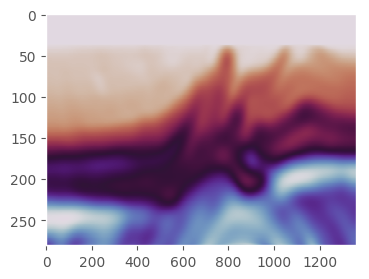

In [16]:
proj.out.vp.it[10].plot()

In [11]:
# proj.env.var

In [18]:
# proj.out.grad.it[10].plot()

In [24]:
# !cat p19/out/p19-Out.log_bckp

In [53]:
!cd p19/out/; for f in  p19-Out.log p19-Err.log p19-JobOut.log p19-JobErr.log; do cp ${f}_bckp $f; done

In [12]:
!cd p19/out/; for f in  p19-Out.log p19-Err.log p19-JobOut.log p19-JobErr.log; do cp ${f} ${f%.log}2.log; done

In [15]:
proj.out.ls()
# proj.out.fit.plot(misfit=1)
# proj.lastcp
# proj.out.log()

Content of /media/kmc3817/RDS/home/my_ephemeral/PROJECTS/fwi_marm_AIT_2D/p19/out

total 126M
-rwx------ 1 kmc3817 root 3.1K Dec 11 11:47 p19-JobErr2.log
-rwx------ 1 kmc3817 root  483 Dec 11 11:47 p19-JobOut2.log
-rwx------ 1 kmc3817 root  135 Dec 11 11:47 p19-Err2.log
-rwx------ 1 kmc3817 root 652K Dec 11 11:47 p19-Out2.log
-rwx------ 1 kmc3817 root 3.1K Dec 10 20:18 p19-JobErr.log
-rwx------ 1 kmc3817 root  483 Dec 10 20:18 p19-JobOut.log
-rwx------ 1 kmc3817 root  135 Dec 10 20:18 p19-Err.log
-rwx------ 1 kmc3817 root 652K Dec 10 20:18 p19-Out.log
-rwx------ 1 kmc3817 root 3.1K Dec 10 20:17 p19-JobErr.log_bckp
-rwx------ 1 kmc3817 root  483 Dec 10 20:17 p19-JobOut.log_bckp
-rwx------ 1 kmc3817 root  135 Dec 10 20:17 p19-Err.log_bckp
-rwx------ 1 kmc3817 root 652K Dec 10 20:17 p19-Out.log_bckp
-rwx------ 1 kmc3817 root 1.8M Dec 10 08:55 p19-CP00031-Vp.sgy
-rwx------ 1 kmc3817 root 4.9K Dec 10 08:55 p19-CP00031-Runfile.key
-rwx------ 1 kmc3817 root 1.8M Dec 10 08:07 p19-CP00030-Vp.sgy

In [8]:
a = proj.out.out.read(run_id=1)
a = proj.out.err.read(run_id=1)
a = proj.out.jobout.read(run_id=1)
a = proj.out.joberr.read(run_id=1)

AttributeError: 'OutLogFile' object has no attribute '_manage'

## (p21) Same as p19, dump gradients

In [9]:
log_lvl(30)
env = {'SLAVES_DUMPCOMPARE': 'yes', 
       'SLAVES_DUMPCSREFS': '1,81,161',
       'SCHEDULER_DUMPRAWGRAD': 'yes', 'SCHEDULER_DUMPGRAD': 'yes'}
proj = ProjInv('p21', exe=exe, env=env, dt=dt, ns=ns, dx=dx, dims=dims)

[autoreload of fullwavepy.ioapi.segy failed: Traceback (most recent call last):
  File "/home/kmc3817/.local/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/kmc3817/.local/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/home/kmc3817/.local/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/home/kmc3817/.local/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/home/kmc3817/.local/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "/home/kmc3817/.local/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 312, in update_instances
    update_instances(old, 

KeyboardInterrupt: 

In [8]:
proj.out.dumpcomp.it[1][1].fname

'./p21//out/p21-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr'

In [9]:
log_lvl(20)
# proj.env.info()

### Inp

6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00640982 s, 499 kB/s

6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00515859 s, 620 kB/s



NameError: name 'plplot' is not defined

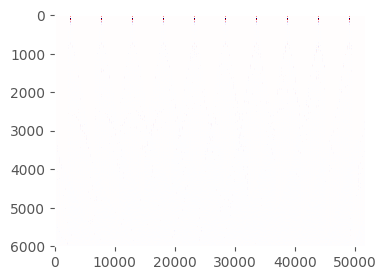

In [8]:
proj.inp.plot()

In [16]:
proj.inp.dupl(input_path='p19/inp/', project_name='p19')

In [8]:
# proj.inp.pbs.prepare(run_id=1)

In [25]:
# proj.inp.check_by_fullwave()

In [12]:
proj.out.rm()
!rm /media/kmc3817/RDS/home/my_ephemeral/PROJECTS/fwi_marm_AIT_2D/p21/out/rm_*

Content of /media/kmc3817/RDS/home/my_ephemeral/PROJECTS/fwi_marm_AIT_2D/p21/out

total 0
 
rm: cannot remove '/media/kmc3817/RDS/home/my_ephemeral/PROJECTS/fwi_marm_AIT_2D/p21/out/rm_*': No such file or directory


### Out

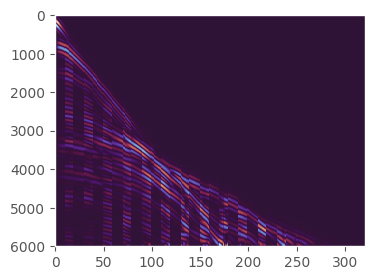

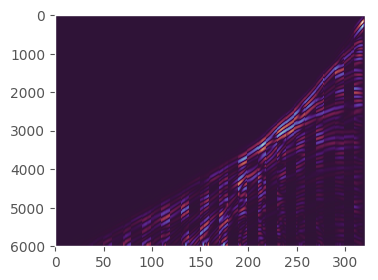

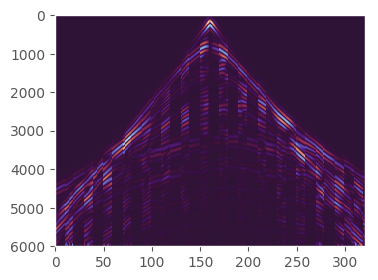

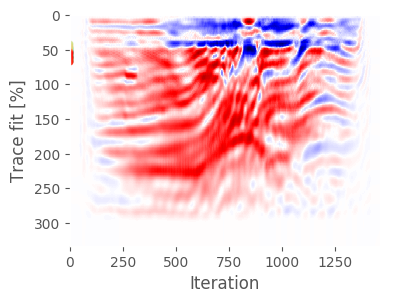

In [17]:
proj.out.plot()

In [8]:
# proj.out.ls()

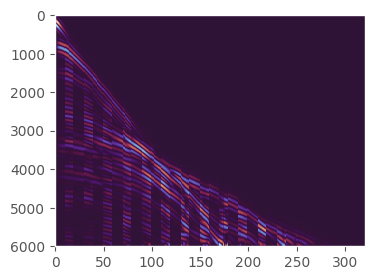

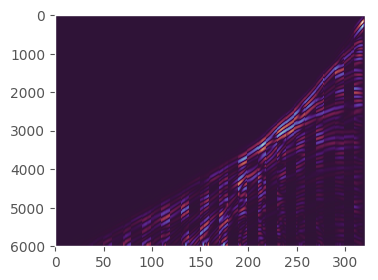

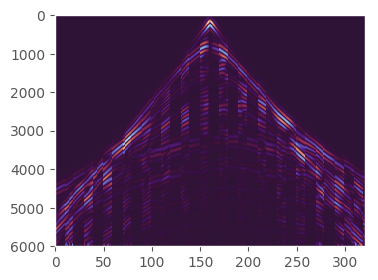

<Figure size 400x300 with 0 Axes>

In [16]:
proj.out.dumpcomp.plot()

In [9]:
proj.out.vp.plot()

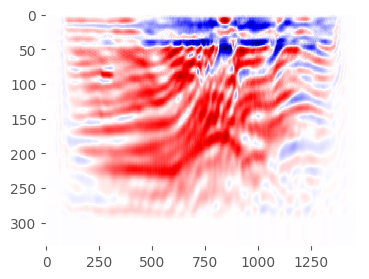

In [8]:
proj.out.grad.plot()

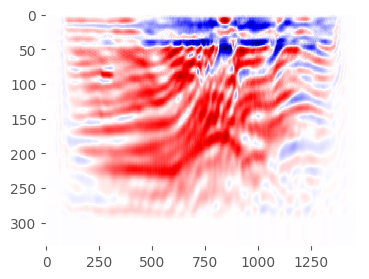

In [12]:
proj.out.rawgrad.plot()

In [15]:
# proj.out.ls()

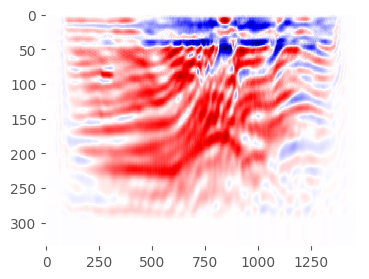

In [10]:
proj.out.grad.it[1].plot()

# ...